In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from SpikyNet import Model

In [2]:
# CORTICAL MODEL.

dt = 0.1    # Timestep (ms).

net = Model(dt=dt, verbose=0)

N_total = 400

N_Pyr_1 = int(N_total*.4)
N_Pyr_2 = int(N_total*.4)

N_LocalInh_1 = int(N_total*.08)
N_LocalInh_2 = int(N_total*.08)

N_GlobalInh = int(N_total*.04)

w_mean = 10.
w_std = 2.
ACh = .5   # Acetilcholine: increases local inhibition while decreases global inhibition.


# POPULATIONS (parameters from Teeter et al Nature Comms 2018). (Scales: C=pF, R=MOhms, T=ms, V=mV, g_syn=mA)
# Pyr: pyramidal cells (exc); PV: parvalbumin cells (local inh); SOM: somatostatin cells (global inh); VIP: vasointestinal-peptide cells (inh).
net.add_Population(name='Pyr 1', N=N_Pyr_1, type='LIF', tau_m=0, C=107, R=177, tau_ref=4.6, Vth=-47.2, Vrest=-75.5, Vreset=-75.5)
net.add_Population(name='Pyr 2', N=N_Pyr_2, type='LIF', tau_m=0, C=107, R=177, tau_ref=4.6, Vth=-47.2, Vrest=-75.5, Vreset=-75.5)
net.add_Population(name='PV 1', N=N_LocalInh_1, type='LIF', tau_m=0, C=54.4, R=126, tau_ref=1.65, Vth=-46.2, Vrest=-75.2, Vreset=-75.2)
net.add_Population(name='PV 2', N=N_LocalInh_2, type='LIF', tau_m=0, C=54.4, R=126, tau_ref=1.65, Vth=-46.2, Vrest=-75.2, Vreset=-75.2)
net.add_Population(name='SOM', N=N_GlobalInh, type='LIF', tau_m=0, C=71, R=226, tau_ref=2.1, Vth=-46, Vrest=-71.5, Vreset=-71.5)
#net.add_Population(name='VIP', N=N_GlobalInh, type='LIF', tau_m=0, C=57.9, R=332, tau_ref=3.75, Vth=-46, Vrest=-72, Vreset=-72)


# CONNECTIONS.
# Recurrent excitation.
net.add_Connection(pre='Pyr 1', post='Pyr 1', 
                   connect_ratio=int(N_Pyr_1*.1), reverse=False, sign=1, learning=0, 
                   ordered=False, g_syn=0.1, tau_psc=40, mean=w_mean, std=w_std)
net.add_Connection(pre='Pyr 2', post='Pyr 2', 
                   connect_ratio=int(N_Pyr_2*.1), reverse=False, sign=1, learning=0, 
                   ordered=False, g_syn=0.1, tau_psc=40, mean=w_mean, std=w_std)

# Mutual inhibition.
net.add_Connection(pre='Pyr 1', post='PV 1', 
                   connect_ratio=int(N_Pyr_1/6), reverse=False, sign=1, learning=0, 
                   ordered=False, g_syn=0.1, tau_psc=10, mean=w_mean*2, std=w_std)
net.add_Connection(pre='PV 1', post='Pyr 2', 
                   connect_ratio=int(N_LocalInh_1), reverse=False, sign=-1, learning=0, 
                   ordered=False, g_syn=0.3, tau_psc=10, mean=ACh, std=ACh*.2)
net.add_Connection(pre='Pyr 2', post='PV 2', 
                   connect_ratio=int(N_Pyr_2/6), reverse=False, sign=1, learning=0, 
                   ordered=False, g_syn=0.1, tau_psc=10, mean=w_mean*2, std=w_std)
net.add_Connection(pre='PV 2', post='Pyr 1', 
                   connect_ratio=int(N_LocalInh_2), reverse=False, sign=-1, learning=0, 
                   ordered=False, g_syn=0.3, tau_psc=10, mean=ACh, std=ACh*.2)

# Global inhibition.
net.add_Connection(pre='Pyr 1', post='SOM', 
                   connect_ratio=int(N_Pyr_1*.2), reverse=False, sign=1, learning=0, 
                   ordered=False, g_syn=0.1, tau_psc=10, mean=w_mean, std=w_std)
net.add_Connection(pre='SOM', post='Pyr 1', 
                   connect_ratio=int(N_GlobalInh), reverse=False, sign=-1, learning=0, 
                   ordered=False, g_syn=0.3, tau_psc=10, mean=(1-ACh), std=(1-ACh)*.2)
net.add_Connection(pre='Pyr 2', post='SOM', 
                   connect_ratio=int(N_Pyr_2*.2), reverse=False, sign=1, learning=0, 
                   ordered=False, g_syn=0.1, tau_psc=10, mean=w_mean, std=w_std)
net.add_Connection(pre='SOM', post='Pyr 2', 
                   connect_ratio=int(N_GlobalInh), reverse=False, sign=-1, learning=0, 
                   ordered=False, g_syn=0.3, tau_psc=10, mean=(1-ACh), std=(1-ACh)*.2)

net.summary()

 Populations Information 


,Pyr 1,Pyr 2,PV 1,PV 2,SOM
Number of Neurons,160.000000,160.000000,32.000000,32.000000,16.000000
Membrane Taus (s),0.018939,0.018939,0.006854,0.006854,0.016046
Refractory Period (s),0.004600,0.004600,0.001650,0.001650,0.002100
Spike Threshold (V),-0.047200,-0.047200,-0.046200,-0.046200,-0.046000




 Connectivity Matrix 


,Pyr 1,Pyr 2,PV 1,PV 2,SOM
Pyr 1,16,0,26,0,32
Pyr 2,0,16,0,26,32
PV 1,0,-32,0,0,0
PV 2,-32,0,0,0,0
SOM,-16,-16,0,0,0




 Synaptic Taus (s) 


,Pyr 1,Pyr 2,PV 1,PV 2,SOM
Pyr 1,0.04,0.00,0.01,0.00,0.01
Pyr 2,0.00,0.04,0.00,0.01,0.01
PV 1,0.00,0.01,0.00,0.00,0.00
PV 2,0.01,0.00,0.00,0.00,0.00
SOM,0.01,0.01,0.00,0.00,0.00


In [3]:
T_trial = 1000   # ms

indxs = np.random.choice(np.arange(N_Pyr_1), int(N_Pyr_1*.2))

net.reset(weights=True)

V1 = []
V2 = []
for t in np.arange(0, T_trial+dt, dt):
    V1.append(np.mean(net.readout_Population(population='Pyr 1')))
    V2.append(np.mean(net.readout_Population(population='Pyr 2')))
    
    net.add_externalCurrent(population='Pyr 1', mean=500e-12, std=300e-12, indxs=indxs)
    net.add_externalCurrent(population='Pyr 2', mean=500e-12, std=300e-12, indxs=indxs)
    net.advance()

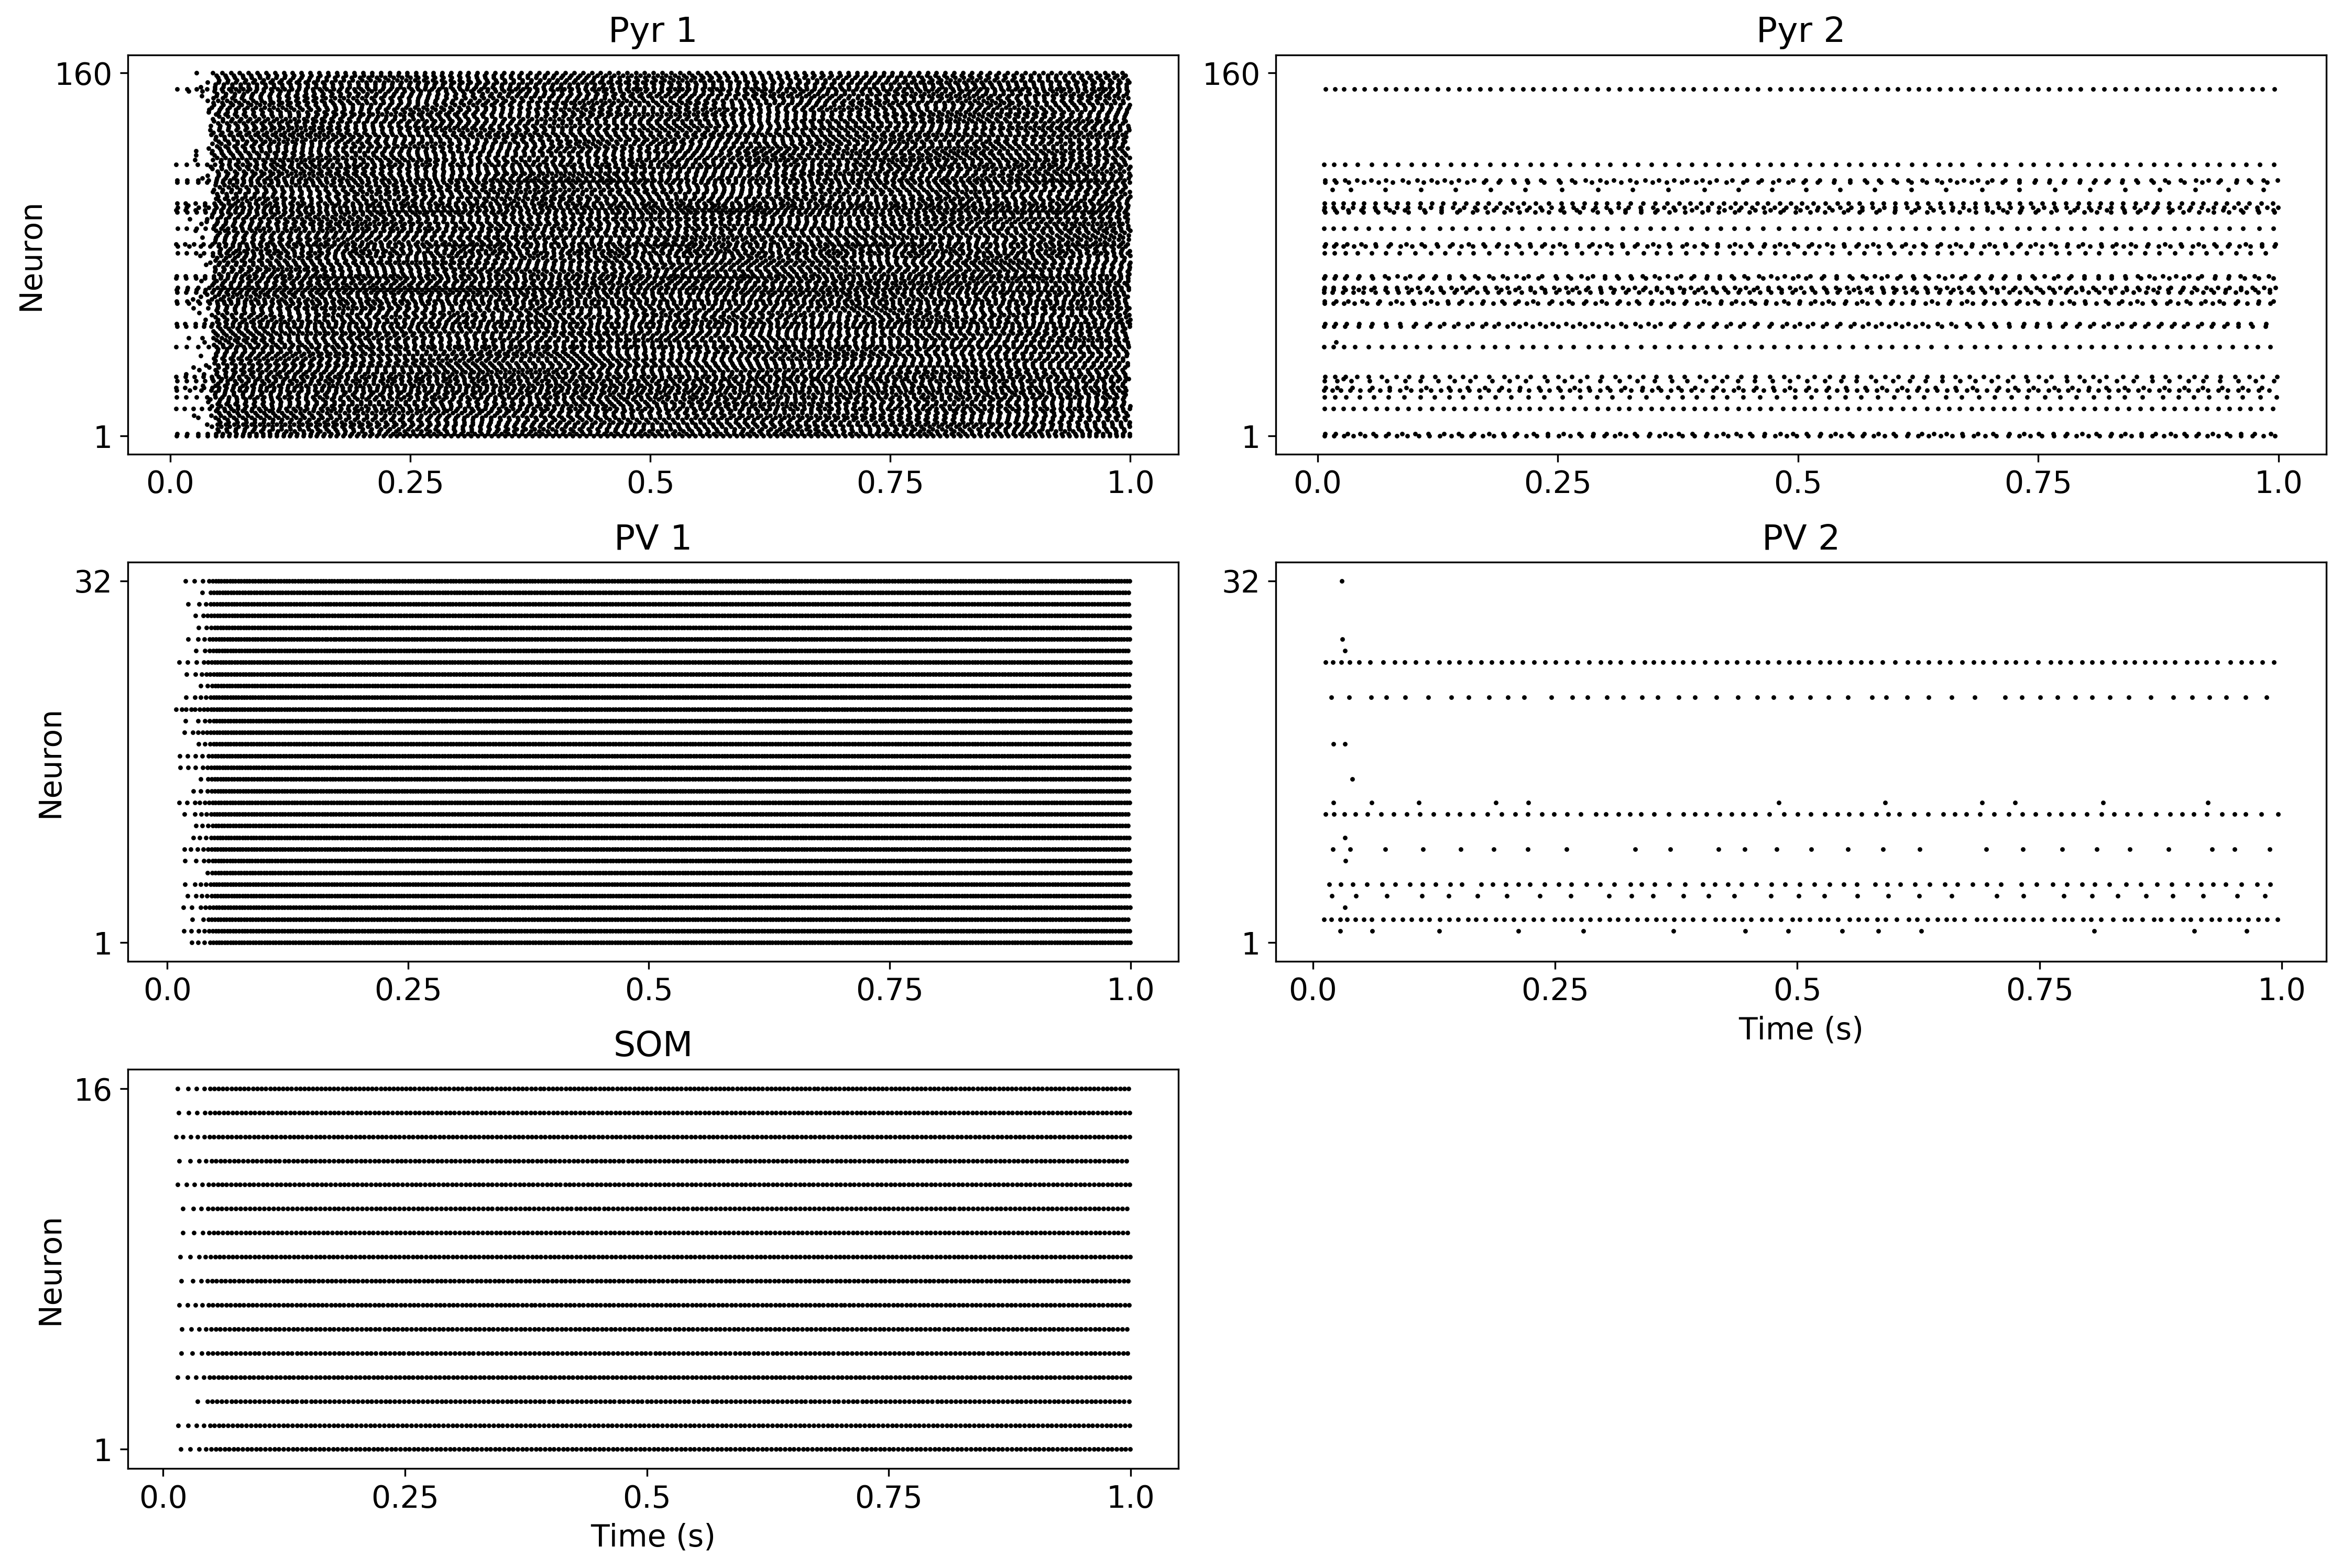

In [4]:
r = net.plot_rasters(time_limits=[], marker_size=5.)

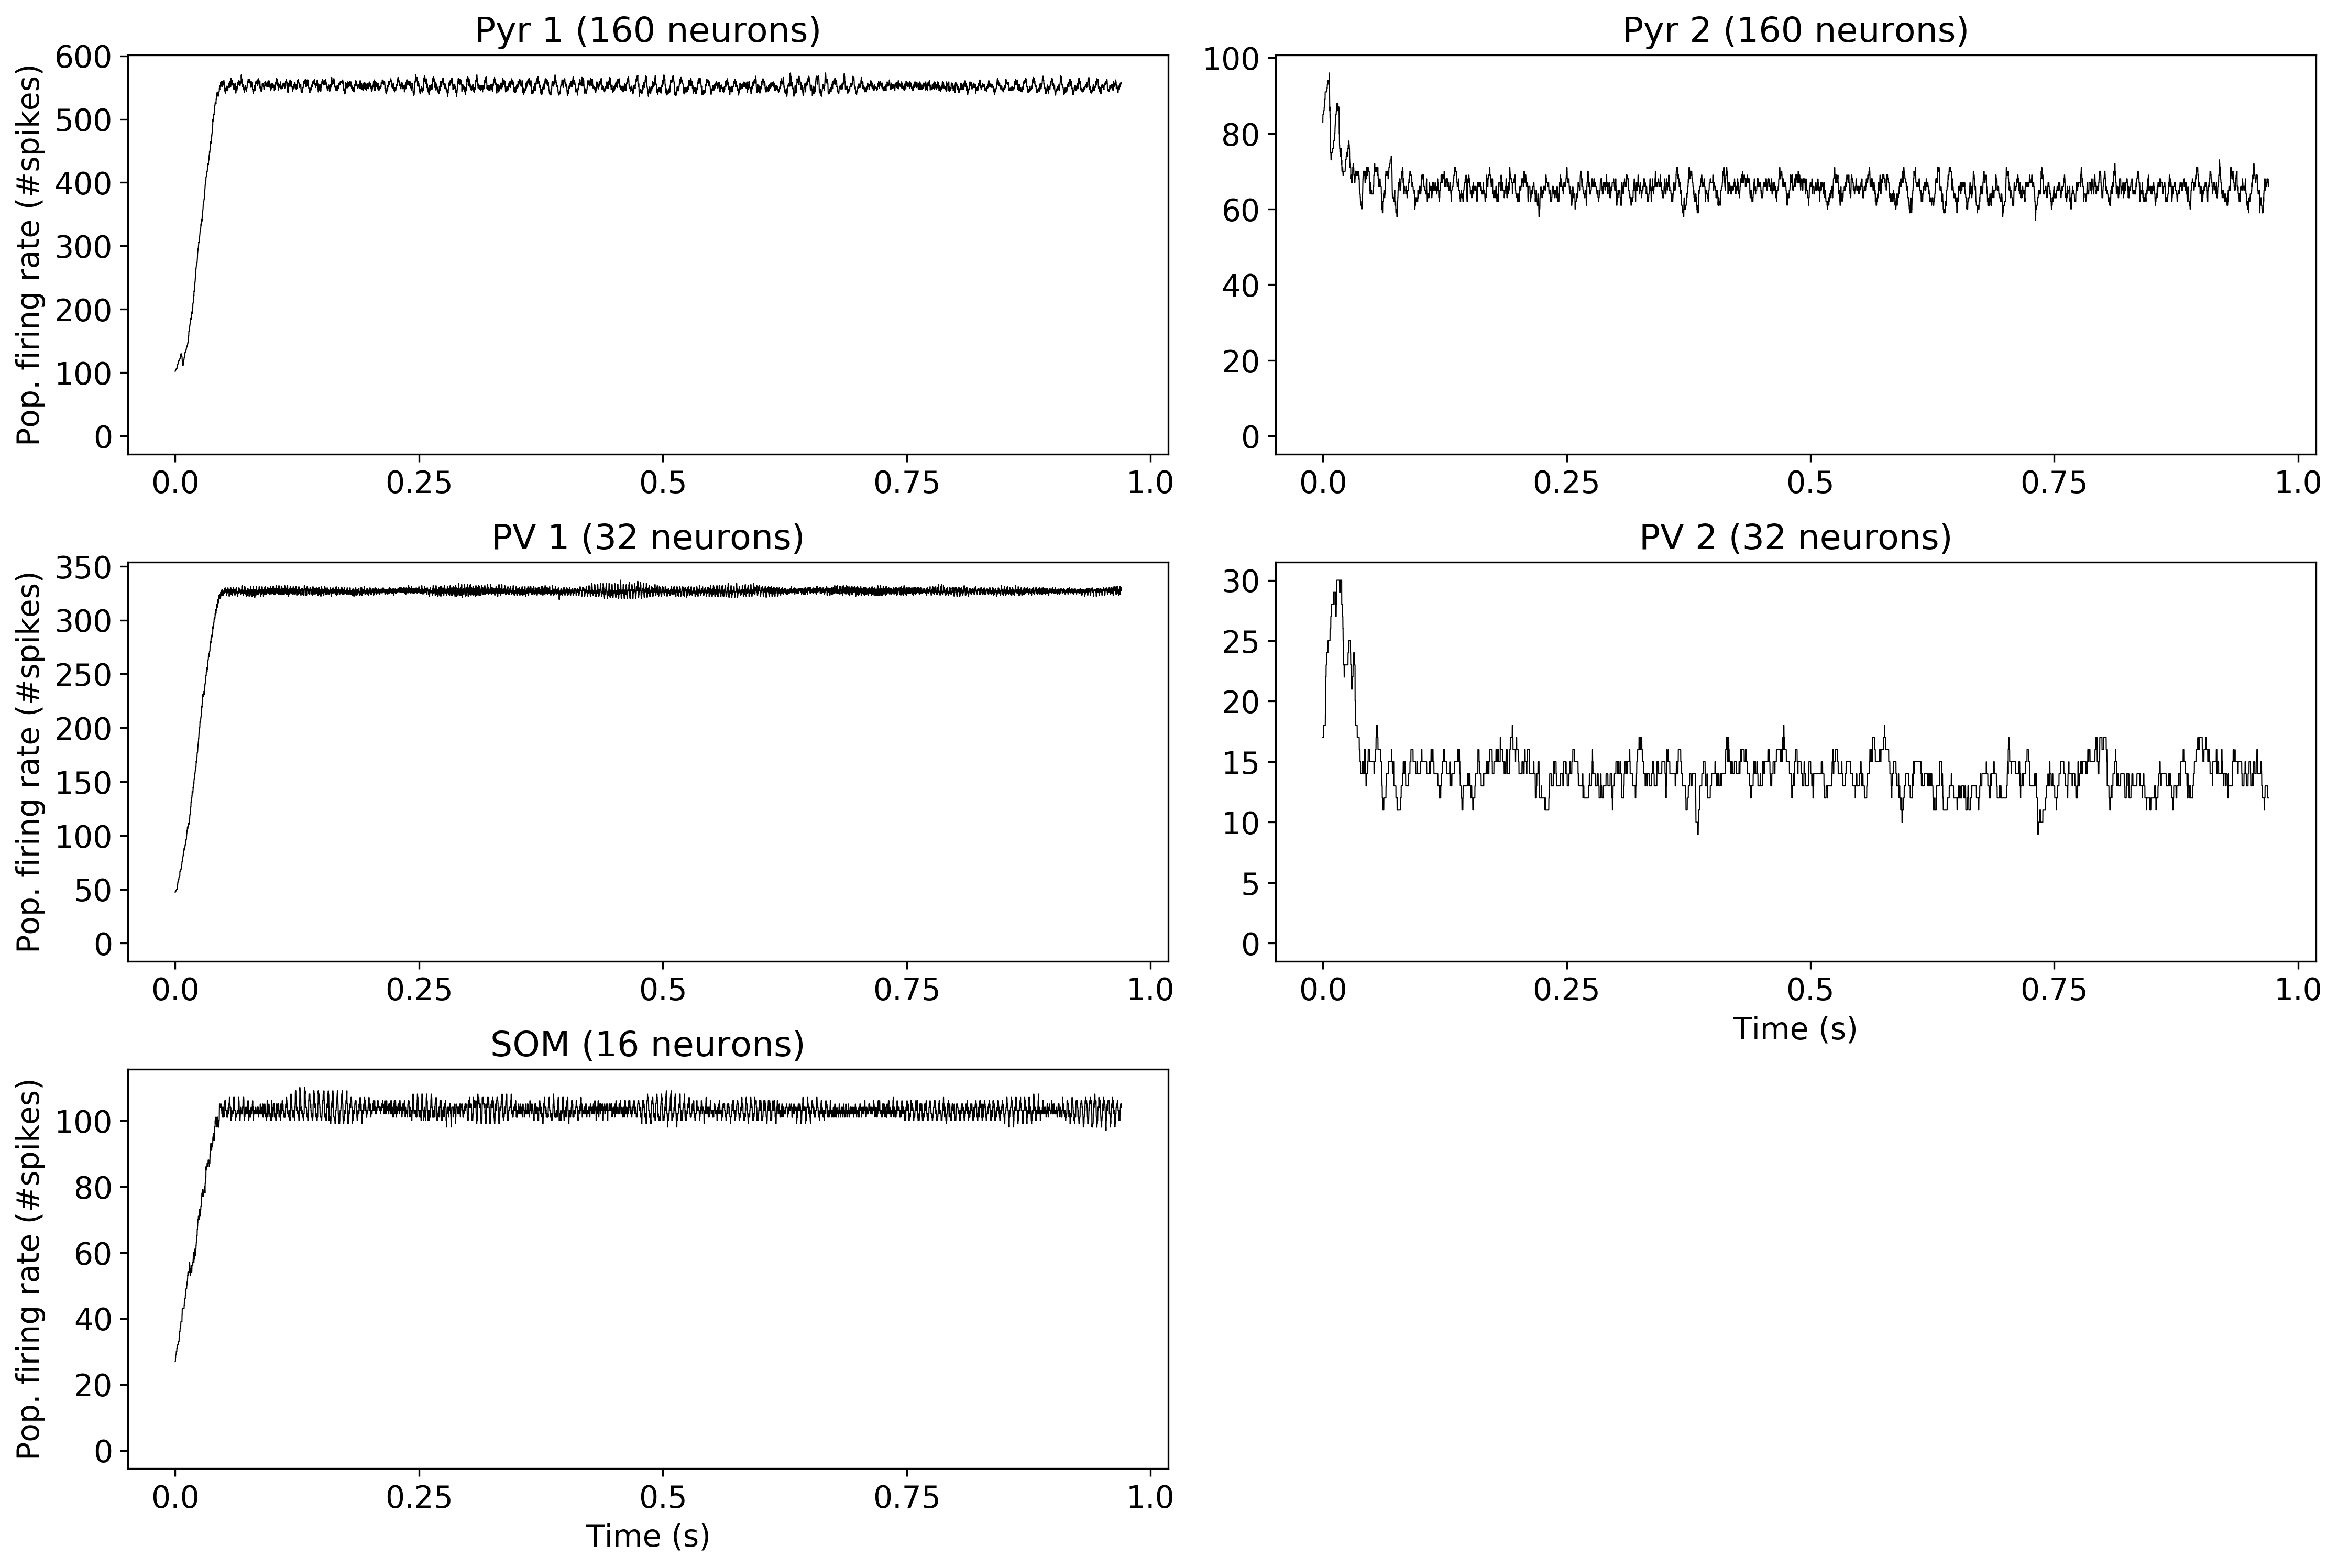

In [5]:
net.plot_firingRates(type='average', time_window=30e-3, time_limits=())

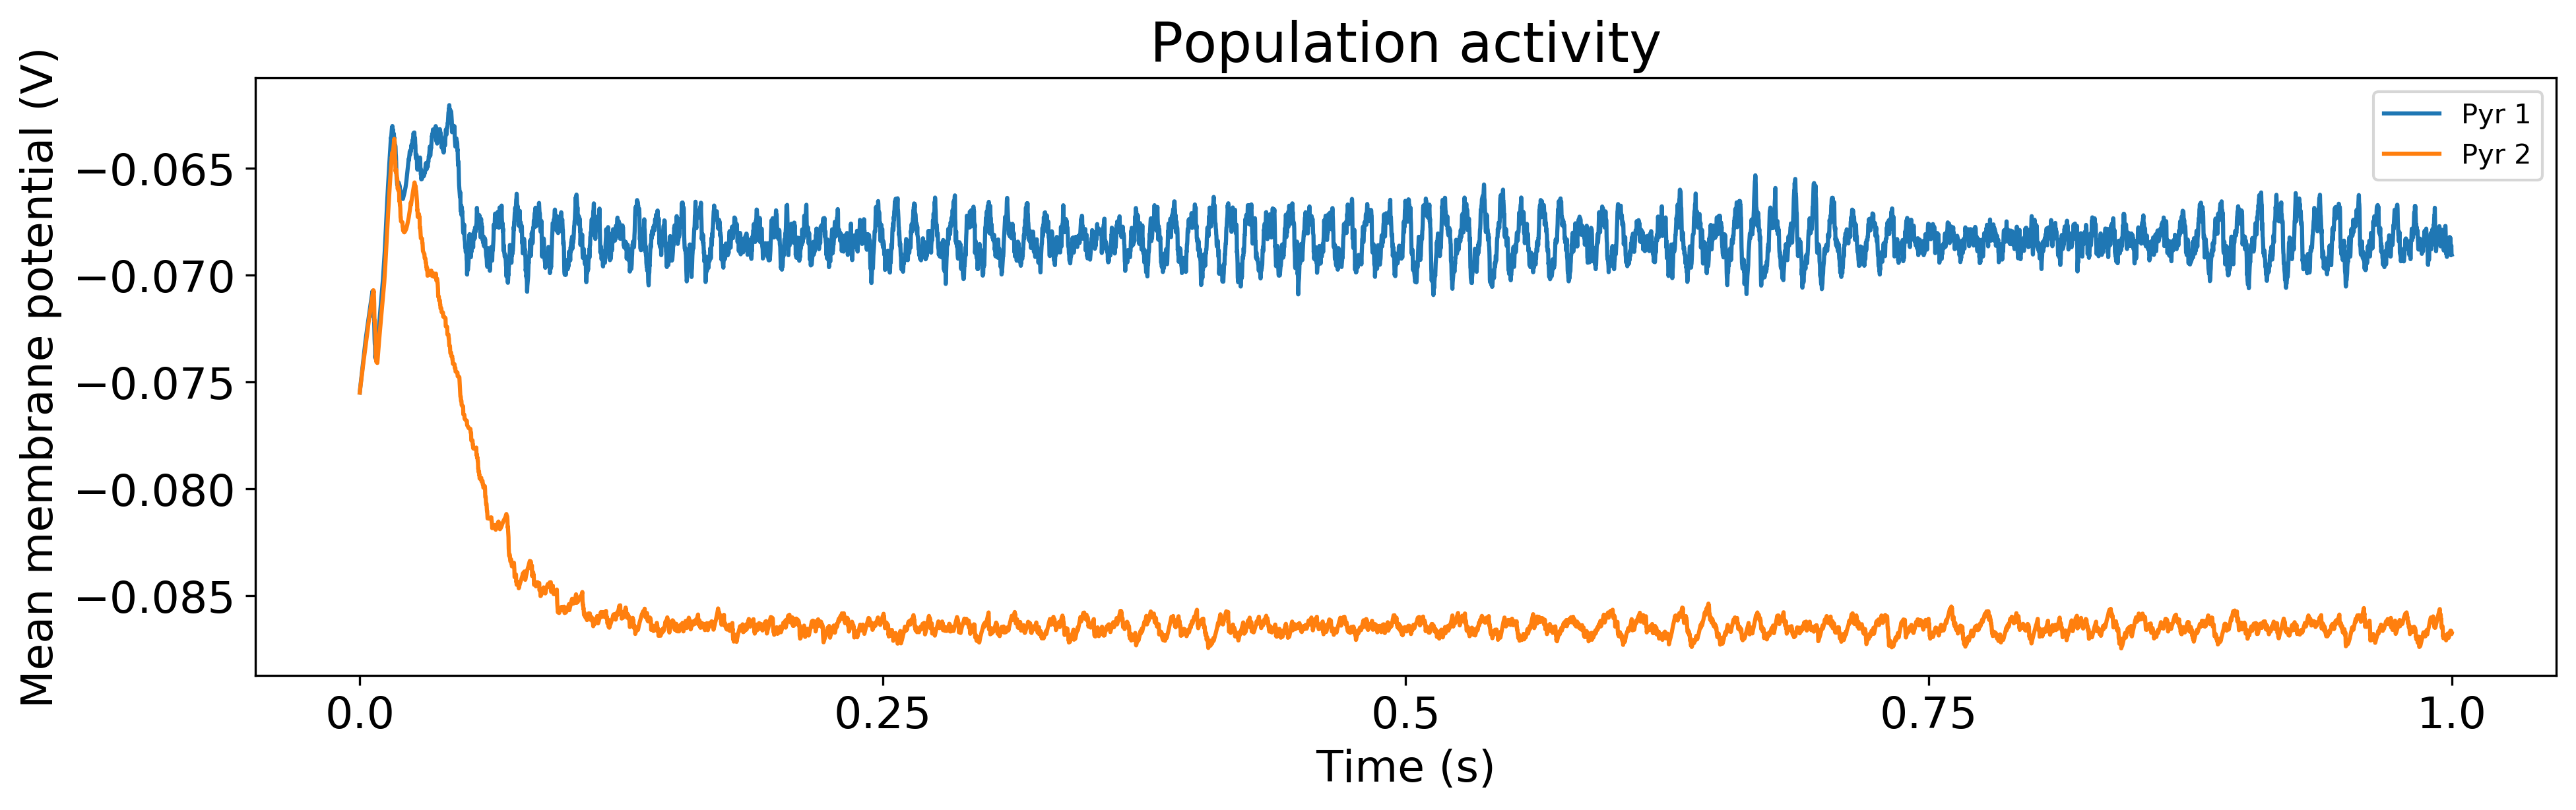

In [6]:
# LFP as the mean of population' membrane potential

minn = np.concatenate([V1, V2]).min()
maxx = np.concatenate([V1, V2]).max()

plt.figure(figsize=(15,4), dpi=300)
plt.plot(V1, label='Pyr 1')
plt.plot(V2, label='Pyr 2')
plt.title('Population activity', fontsize=20)
plt.xticks(np.linspace(0, int(T_trial/dt), 5), np.linspace(0, T_trial*1e-3, 5, dtype=float), fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Mean membrane potential (V)', fontsize=16)
plt.legend()
plt.show()